# Sentiment Analysis for Customer Reviews Challenge

## Challenge:
Develop a robust Sentiment Analysis classifier for XYZ customer reviews, automating the categorization into positive, negative, or neutral sentiments. Utilize Natural Language Processing (NLP) techniques, exploring different sentiment analysis methods.

## Problem Statement:
XYZ organization, a global online retail giant, accumulates a vast number of customer reviews daily. Extracting sentiments from these reviews offers insights into customer satisfaction, product quality, and market trends. The challenge is to create an effective sentiment analysis model that accurately classifies XYZ customer reviews.

### Important Instructions:

1. Make sure this ipynb file that you have cloned is in the __Project__ folder on the Desktop. The Dataset is also available in the same folder.
2. Ensure that all the cells in the notebook can be executed without any errors.
3. Once the Challenge has been completed, save the SentimentAnalysis.ipynb notebook in the __*Project*__ Folder on the desktop. If the file is not present in that folder, autoevalution will fail.
4. Print the evaluation metrics of the model. 
5. Before you submit the challenge for evaluation, please make sure you have assigned the Accuracy score of the model that was created for evaluation.
6. Assign the Accuracy score obtained for the model created in this challenge to the specified variable in the predefined function *submit_accuracy_score*. The solution is to be written between the comments `# code starts here` and `# code ends here`
7. Please do not make any changes to the variable names and the function name *submit_accuracy_score* as this will be used for automated evaluation of the challenge. Any modification in these names will result in unexpected behaviour.

### --------------------------------------- CHALLENGE CODE STARTS HERE --------------------------------------------

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nltk
import matplotlib as mtb
import re

In [3]:
df = pd.read_csv("/home/labuser/Desktop/Project/Reviews.csv")

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(568454, 10)

### Data Preprocessing

In [6]:
df["Helpful%"]=np.where(df["HelpfulnessDenominator"]>0,df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"],-1)

In [7]:
df['Helpful%'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [8]:
df["%upvote"]=pd.cut(df["Helpful%"],bins=[-1,0,0.2,0.4,0.6,0.8,1.0],labels=["Empty",'0-20%','20-40%',"40-60%","60-80%","80-100%"])

### Pivot Table & Heat Map

In [9]:
df.groupby(['Score','%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [10]:
df2= df.groupby(['Score','%upvote']).agg({'Id':'count'}).reset_index()

In [11]:
df2

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [12]:
pivot= df2.pivot(index='%upvote',columns='Score')

In [13]:
import seaborn as sns

<Axes: xlabel='None-Score', ylabel='%upvote'>

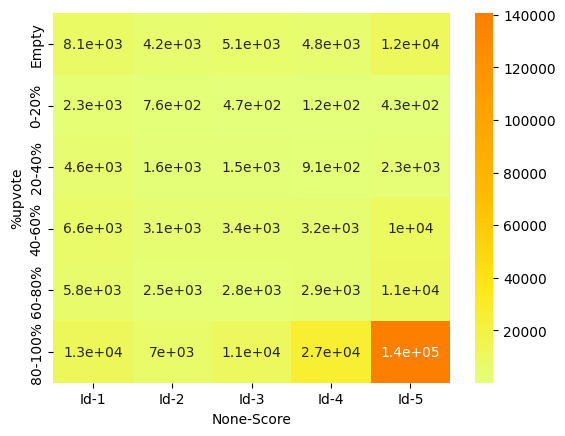

In [14]:
sns.heatmap(pivot,annot=True,cmap='Wistia')

In [15]:
df3=df[df['Score']!=3]
df3.groupby(['Score','%upvote']).agg({"Id":"count"})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [16]:
def Clean(text):
    text=re.sub('@[a-zA-Z0-9]+',"",text)
    text=re.sub('#',"",text)
    text=re.sub('RT[\s]+',"",text)
    text=re.sub('https?:\/\/\S+',"",text)

In [17]:
df3['Text']=df3['Text'].apply(Clean)

In [18]:
df3.shape

(525814, 12)

### Model

In [21]:
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%


### Getting X and Y for model training

In [32]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [69]:
dict={1:0,2:0,3:1,4:1,5:1}
y=df['Score'].map(dict)
y  

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Score, Length: 568454, dtype: int64

In [70]:
X=df['Text']  

### Term frequency-inverse document frequency Vectorizer

In [71]:
X=df['Text']

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
traindatatdf= tfidf.fit_transform(X)

In [73]:
traindatatdf.shape[1]

119939

In [74]:
from sklearn.model_selection import train_test_split
X_train_tdf, X_test_tdf, y_train_tdf, y_test_tdf = train_test_split(traindatatdf, y, test_size=0.33, random_state=42)

In [75]:
print("X_train {}".format(X_train_tdf.shape[0]),"y_train {}".format(y_train_tdf.shape[0]))
print("X_test {}".format(X_test_tdf.shape[0]),"y_test {}".format(y_test_tdf.shape[0]))

X_train 380864 y_train 380864
X_test 187590 y_test 187590


### Logistic Regression (TD-IDF vectorizer)

In [76]:
from sklearn.linear_model import LogisticRegression
model_lr_tdf=LogisticRegression()

In [77]:
model_lr_tdf.fit(X_train_tdf, y_train_tdf)

LogisticRegression()

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Pastel1, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 16089  10651]
 [  3751 157099]]


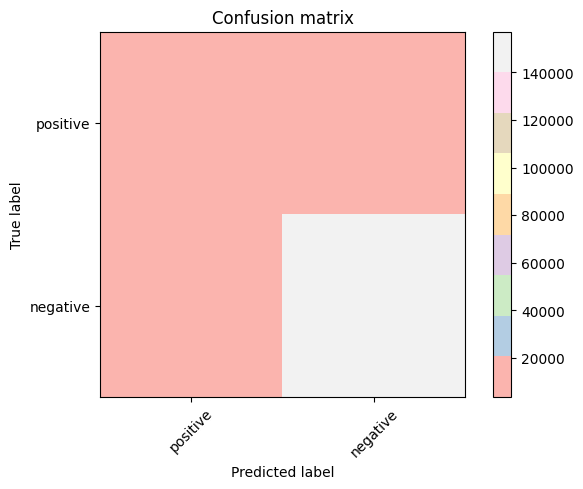

In [79]:
plt.figure()
cm=confusion_matrix(y_test_tdf,model_lr_tdf.predict(X_test_tdf))
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [80]:
from sklearn.metrics import classification_report
acc3 = model_lr_tdf.score(X_test_tdf, y_test_tdf)
print ('Model Accuracy: {}'.format(acc3))
print("\n")
report=classification_report(y_test_tdf,model_lr_tdf.predict(X_test_tdf))
print(report)

Model Accuracy: 0.9232261847646464


              precision    recall  f1-score   support

           0       0.81      0.60      0.69     26740
           1       0.94      0.98      0.96    160850

    accuracy                           0.92    187590
   macro avg       0.87      0.79      0.82    187590
weighted avg       0.92      0.92      0.92    187590



### Random Forest (TF-IDF Vectorizer)




In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model_rf_tdf=RandomForestClassifier(n_estimators=250,max_depth=3,criterion='entropy')

In [83]:
model_rf_tdf.fit(X_train_tdf, y_train_tdf)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=250)

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 16089  10651]
 [  3751 157099]]


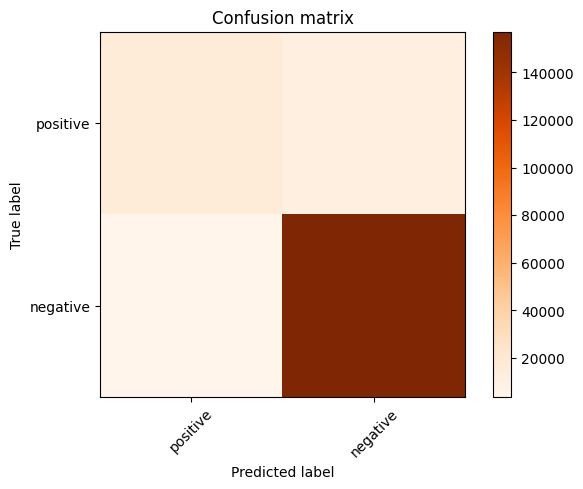

In [86]:
plt.figure()
cm=confusion_matrix(y_test_tdf,model_lr_tdf.predict(X_test_tdf))
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [87]:
from sklearn.metrics import classification_report
acc4 = model_rf_tdf.score(X_test_tdf, y_test_tdf)
print ('Model Accuracy: {}'.format(acc4))
print("\n")
report=classification_report(y_test_tdf,model_rf_tdf.predict(X_test_tdf))
print(report)

Model Accuracy: 0.857455088224319


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     26740
           1       0.86      1.00      0.92    160850

    accuracy                           0.86    187590
   macro avg       0.43      0.50      0.46    187590
weighted avg       0.74      0.86      0.79    187590



### Linear Support Vector Machine (TD-IDF Vectorizer)

In [88]:
from sklearn.svm import LinearSVC
basicmodel_tdf= LinearSVC(C=0.1, class_weight='balanced')
basicmodel_tdf.fit(X_train_tdf, y_train_tdf)

LinearSVC(C=0.1, class_weight='balanced')

In [89]:
data_viz = [['Logistic Regression (TD-IDF)', acc3*100], ['Random Forest (TD-IDF)', acc4*100],['Linear Support Vector Machine (TD-IDF)', acc6*100]]
plot = pd.DataFrame(data_viz, columns = ['Model', 'Accuracy'])
plot

,Model,Accuracy
0,Logistic Regression (TD-IDF),92.322618
1,Random Forest (TD-IDF),85.745509
2,Linear Support Vector Machine (TD-IDF),87.210406


### Plot

In [90]:
import seaborn as sns

Text(0.5, 1.0, 'Model Performance Comparison')

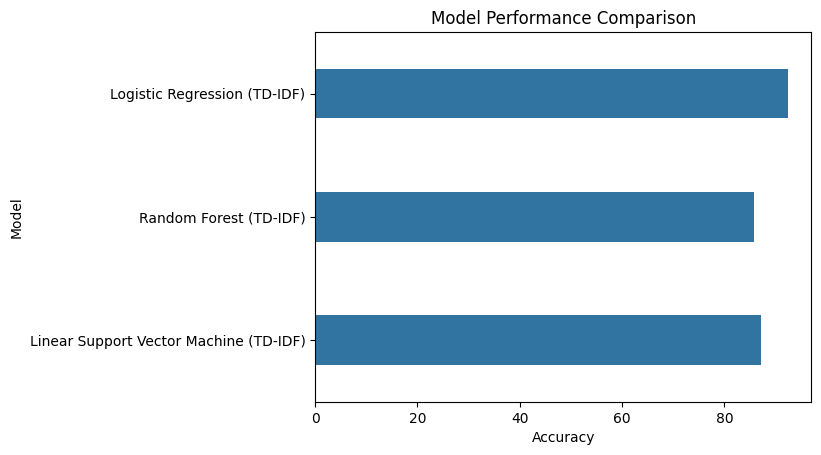

In [101]:
sns.barplot(data=plot, y="Model",x="Accuracy", width=0.4, orient="y").set_title('Model Performance Comparison')

### --------------------------------------- CHALLENGE CODE ENDS HERE --------------------------------------------

### NOTE:
1. Assign the Accuracy score obtained for the model created in this challenge to the specified variable in the predefined function *submit_accuracy_score* below. The solution is to be written between the comments `# code starts here` and `# code ends here`
2. Please do not make any changes to the variable names and the function name *submit_accuracy_score* as this will be used for automated evaluation of the challenge. Any modification in these names will result in unexpected behaviour.

In [93]:
def submit_accuracy_score()-> float:
    #accuracy should be in the range of 0.0 to 1.0
    accuracy = 0.0
    # code starts here
    accuracy = acc3
    # code ends here
    return accuracy